In [1]:
import numpy as np
from scipy.stats import maxwell
from math import sqrt
from random import gauss
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

T = 87          # K
M_a = 6.63e-26  # kg
m_e = 9.1e-31   # kg
k_b = 1.38e-23  # J/K

# J to eV
def J_to_eV(J):
    return 6.242e18 * J

# eV to J
def eV_to_J(eV):
    return 1.60218e-19 * eV

# m/s to J
def v_to_E(v):
    return 0.5 * m_e * np.dot(v, v)

# J to m/s
def E_to_v(E):
    return sqrt(2 * E / m_e)

def rand_unit_vec():
    vec = [gauss(0, 1) for i in range(3)]
    mag = sum(x**2 for x in vec)**.5
    return np.array([x / mag for x in vec])

# m/s
def random_velocity(eV):
    mag = E_to_v(eV_to_J(eV))
    return rand_unit_vec() * mag

The below simulates $steps$ number of collisions at electrons energies listed in $en\_list$. It then plots the distribution of the final energies.

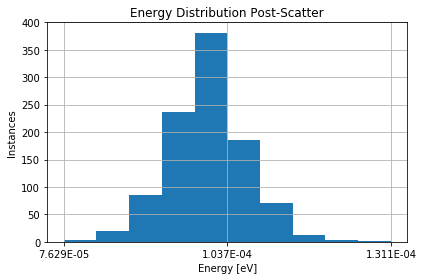

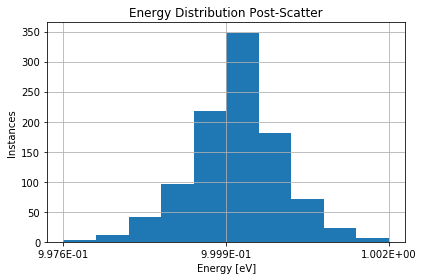

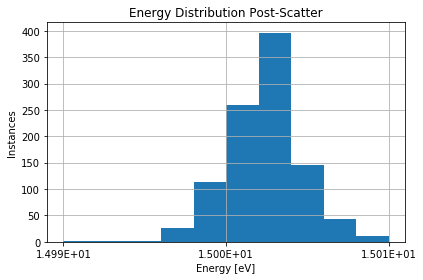

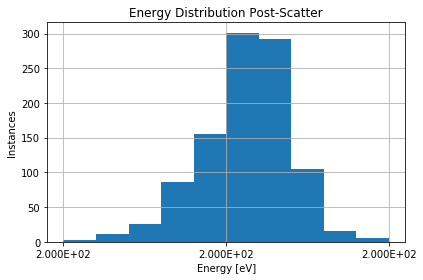

In [2]:
en_list = [0.0001, 1, 15, 200] # Starting electron energies

steps = 1000                   # Number of collisions to simulate

for e in en_list:
    energies = []
    for i in range(steps):
        v = random_velocity(e)

        vm = rand_unit_vec() * maxwell.rvs(size=1, scale=134.568)
        u = np.dot(v - vm, v - vm)**0.5
        n = rand_unit_vec()

        a = (M_a * u) * n
        b = (m_e) * v
        c = (M_a) * vm

        v1 = (a + b + c) / (m_e + M_a)

        v = v1
        
        energy = J_to_eV(v_to_E(v))

        if (energy < 0):
            print(energy)
        
        energies.append(energy)
        
    # plt.rcParams['font.size'] = 14
    # plt.rcParams['font.family'] = 'serif'
    # fig = plt.figure(figsize=(6, 6))
    
    plt.hist(energies, label=str(e), color='C0', histtype='stepfilled')

    plt.xlabel('Energy [eV]')
    plt.ylabel('Instances')

    plt.title('Energy Distribution Post-Scatter')
    plt.xticks(np.linspace(min(energies), max(energies), 3))
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.3E'))

    plt.grid()
    plt.tight_layout()
    plt.show()
    
    # plt.savefig(f'post_scattering_energy_dists_{e}.pdf', bbox_inches='tight')